In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import keras

In [4]:
data = pd.read_csv("Admission_predict_new.csv")
data.drop('Serial No.' , axis = 0 , inplace  = True)

In [11]:
X = data.iloc[: , :7].values
y = data.iloc[: ,8].values

print(X.shape , y.shape)

(500, 7) (500,)


In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:

reg = Sequential()
reg.add(Dense ( units = 14 , kernel_initializer = 'uniform' , activation = 'relu' , input_dim = 7))
reg.add(Dense(units = 14 , kernel_initializer = 'uniform' , activation = 'relu'))
reg.add(Dense(units = 14 , kernel_initializer = 'uniform' , activation = 'relu'))
reg.add(Dense(units = 1 , kernel_initializer = 'uniform' , activation = 'sigmoid'))

reg.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mse'])

f_reg = reg.fit(X_train , y_train , batch_size = 5, nb_epoch = 50)


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
400/400 [==============================] - 2s 4ms/step - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 8/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 9/50
400/400 [==============================] - 1s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 10/5

In [29]:
print(f_reg.history['mean_squared_error'])


[0.06925236098468304, 0.0673648938536644, 0.06476995907723904, 0.06089007779955864, 0.05510912425816059, 0.04774098843336105, 0.03835534248501062, 0.02795226015150547, 0.01915555289015174, 0.012721307203173637, 0.009217602480202914, 0.007562933536246419, 0.006810337910428644, 0.00645780568011105, 0.006184747908264399, 0.005953433574177325, 0.005772495362907648, 0.005608213739469648, 0.005461492948234082, 0.005334368487820029, 0.00524290397297591, 0.005132186715491116, 0.005037772050127387, 0.004953409638255834, 0.004873121785931289, 0.0048103196779266, 0.004749711859039963, 0.004698093910701573, 0.004653718089684844, 0.004599310574121773, 0.004561609076336026, 0.004505894659087062, 0.004460085416212678, 0.004422939871437848, 0.004377417592331767, 0.004335146071389318, 0.00429256591014564, 0.004255740763619542, 0.004216246353462338, 0.004178580059669912, 0.004142968507949263, 0.004104574793018401, 0.0040683645056560636, 0.004033293016254902, 0.004001884930767119, 0.00397204658947885, 0.

In [65]:
from sklearn.metrics import mean_squared_error , r2_score ,mean_squared_log_error 
from math import sqrt

nn_pred = reg.predict(X_test)
mse = mean_squared_error(y_test , nn_pred)
rmse = sqrt(mse)
r2score = r2_score(y_test , nn_pred)
mse_log = mean_squared_log_error(y_test , nn_pred)

print("******{} ******".format("Neural Net"))
print("---------------------------")
print("MSE Score : {}".format(mse))
print("RMSE : {}".format(rmse))
print("Mean Squared Log Error : {}".format(mse_log))
print("R2-Score : {}".format(r2score))

******Neural Net ******
---------------------------
MSE Score : 0.0035415617652061367
RMSE : 0.05951102221610831
Mean Squared Log Error : 0.0013499500005071286
R2-Score : 0.826818495588942


In [66]:
#saving the model

reg.save('NN.h5')


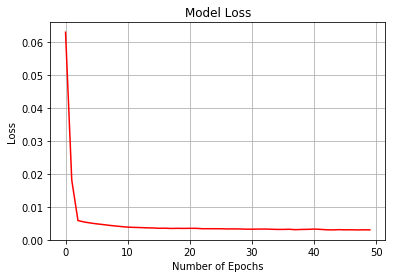

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(f_reg.history['mean_squared_error'] , color = 'r')
plt.grid(True)
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel('Loss')
plt.show()

,Unnamed: 0,MSE,RMSE,MSE Log,R2-Score
0,Ridge,0.003722,0.061011,0.001411,0.817979
1,SVR,0.008837,0.094007,0.003201,0.567856
2,AdaBoost,0.004813,0.069373,0.001799,0.764664
3,RandomForest,0.004321,0.065736,0.001646,0.788692


In [68]:
nn_op = pd.DataFrame(columns = ['MSE' , 'RMSE' , 'MSE Log' , 'R2-Score'])

In [69]:
nn_op.loc['NeuralNet'] = [mse ,rmse ,mse_log , r2score] 

In [70]:
nn_op.to_csv('NeuraNet_op.csv')

In [71]:
nn_op.head()

,MSE,RMSE,MSE Log,R2-Score
NeuralNet,0.003542,0.059511,0.00135,0.826818
